In [111]:
import rebound
import matplotlib.pyplot as plt
import numpy as np

In [137]:
# Initial Configuration
sim = rebound.Simulation()
sim.gravity = 'tree'
sim.integrator = 'leapfrog'
sim.configure_box(150.)   # confine the simulation to a box of size 10
sim.boundary = 'open'
sim.dt = 0.001
sim.softening = 0.01
#sim.status()

In [138]:
# Generate a galaxy in the x-y plane
def generate_galaxy(N,Na,M,ptm,r_max,r_min,z_s,cx,cy,cz,cvx,cvy,cvz):
    r = np.linspace(r_min,r_max,N)
    angle = np.linspace(0,2*np.pi*(Na-1)/Na,Na)
    x_pos = []
    y_pos = []
    z_pos = []
    for i in range(N):
        for j in range(Na):
            x_pos.append(r[i]*np.cos(angle[j]))
            y_pos.append(r[i]*np.sin(angle[j]))
            z_pos.append(z_s*np.random.randn())
    x_pos = np.array(x_pos)
    y_pos = np.array(y_pos)
    z_pos = np.array(z_pos)
    N_total = N*Na
    radius = np.sqrt(x_pos**2+y_pos**2)
    mu = M + (radius**2-r_min**2)/(r_max**2-r_min**2) * N_total * ptm
    vrot = np.sqrt(mu/radius)
    x_vel = -y_pos/radius * vrot + cvx
    y_vel = x_pos/radius * vrot + cvy
    z_vel = vrot*0 + cvz
    x_pos += cx
    y_pos += cy
    z_pos += cz
    sim.add(m = M, x = cx, y = cy, z = cz, vx = cvx, vy = cvy, vz = cvz)
    for i in range(N_total):
        #print(i)
        sim.add(m = ptm, x = x_pos[i],y = y_pos[i],z = z_pos[i],vx = x_vel[i],vy = y_vel[i],vz = z_vel[i])
# Generate a vertical Galaxy
def generate_vertical_galaxy(N,Na,M,ptm,r_max,r_min,z_s,cx,cy,cz,cvx,cvy,cvz):
    r = np.linspace(r_min,r_max,N)
    angle = np.linspace(0,2*np.pi*(Na-1)/Na,Na)
    x_pos = []
    y_pos = []
    z_pos = []
    for i in range(N):
        for j in range(Na):
            x_pos.append(r[i]*np.cos(angle[j]))
            z_pos.append(r[i]*np.sin(angle[j]))
            y_pos.append(z_s*np.random.randn())
    x_pos = np.array(x_pos)
    y_pos = np.array(y_pos)
    z_pos = np.array(z_pos)
    N_total = N*Na
    radius = np.sqrt(x_pos**2+z_pos**2)
    mu = M + (radius**2-r_min**2)/(r_max**2-r_min**2) * N_total * ptm
    vrot = np.sqrt(mu/radius)
    x_vel = -z_pos/radius * vrot + cvx
    z_vel = x_pos/radius * vrot + cvz
    y_vel = vrot*0 + cvy
    x_pos += cx
    y_pos += cy
    z_pos += cz
    sim.add(m = M, x = cx, y = cy, z = cz, vx = cvx, vy = cvy, vz = cvz)
    for i in range(N_total):
        #print(i)
        sim.add(m = ptm, x = x_pos[i],y = y_pos[i],z = z_pos[i],vx = x_vel[i],vy = y_vel[i],vz = z_vel[i])

In [175]:
# Initial Configuration
sim = rebound.Simulation()
sim.gravity = 'tree'
sim.integrator = 'leapfrog'
sim.configure_box(150.)   # confine the simulation to a box of size 10
sim.boundary = 'open'
sim.dt = 0.001
sim.softening = 0.01
#sim.status()
# Parameters 1
Nr1 = 30
Na1 = 50
N1 = Nr1 * Na1 +1 
M1 = 8000
ptm1 = 1
r_max1 = 20
r_min1 = 3
z_s1 = 0.3
cx1 = 20
cy1 = 20
cz1 = 0
cvx1 = -10
cvy1 = 0
cvz1 = 0
# Parameters 2
Nr2 = 30
Na2 = 50
N2 = Nr2 * Na2 +1 
M2 = 8000
ptm2 = 1
r_max2 = 20
r_min2 = 3
z_s2 = 0.3
cx2 = -20
cy2 = -20
cz2 = 0
cvx2 = 10
cvy2 = 0
cvz2 = 0
# Generate Galaxy
generate_galaxy(Nr1,Na1,M1,ptm1,r_max1,r_min1,z_s1,cx1,cy1,cz1,cvx1,cvy1,cvz1)
generate_vertical_galaxy(Nr2,Na2,M2,ptm2,r_max2,r_min2,z_s2,cx2,cy2,cz2,cvx2,cvy2,cvz2)
N = N1 + N2

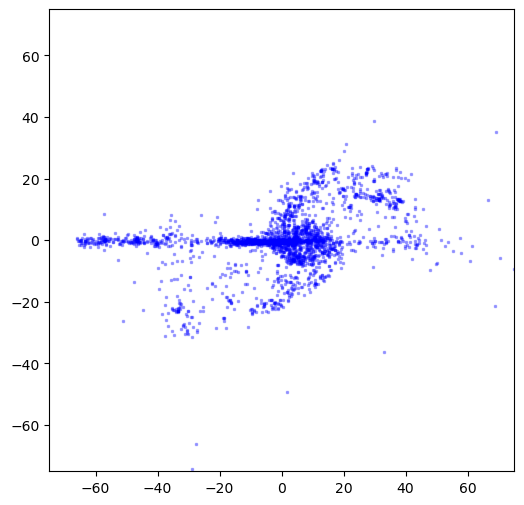

KeyboardInterrupt: 

In [146]:
from IPython.display import clear_output
# Displaying the simulation while the integration runs
t_series = np.arange(0,10,0.005)
x_record = []
y_record = []
z_record = []
for i in range(N):
    try:
        x_p = sim.particles[i].x
        y_p = sim.particles[i].y
    except AttributeError:
        pass
    x_record.append(x_p)
    y_record.append(y_p)
clear_output(wait=True)
fig = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.plot(x_record,y_record,'.',color='blue',alpha=0.5,markersize=5)
ax.set_xlim(-75,75)
ax.set_ylim(-75,75)
#ax.set_zlim3d(-10,10)
plt.show()
for t in t_series:
    sim.integrate(t)
    x_record = []
    y_record = []
    z_record = []
    for i in range(N):
        try:
            x_p = sim.particles[i].x
            y_p = sim.particles[i].z
        except AttributeError:
            pass
        x_record.append(x_p)
        z_record.append(y_p)
    clear_output(wait=True)
    fig = plt.figure(figsize = (6,6))
    ax = plt.axes()
    ax.plot(x_record,z_record,'s',color='blue',alpha=0.3,markersize=2)
    ax.set_xlim(-75,75)
    ax.set_ylim(-75,75)
    #ax.set_zlim3d(-10,10)
    plt.show()

In [176]:
from IPython.display import clear_output
from tqdm import tqdm
# saving the integration series for later plots (e.g. 3D)
t_series = np.arange(0,10,0.005)
x_pos = []
y_pos = []
z_pos = []
x_record = []
y_record = []
z_record = []
for i in range(N):
    try:
        x_p = sim.particles[i].x
        y_p = sim.particles[i].y
        z_p = sim.particles[i].z
    except AttributeError:
        pass
    x_pos.append(x_p)
    y_pos.append(y_p)
    z_pos.append(z_p)
x_record.append(x_pos)
y_record.append(y_pos)
z_record.append(z_pos)
for t in tqdm(t_series):
    sim.integrate(t)
    x_pos = []
    y_pos = []
    z_pos = []
    for i in range(N):
        try:
            x_p = sim.particles[i].x
            y_p = sim.particles[i].y
            z_p = sim.particles[i].z
        except AttributeError:
            pass
        x_pos.append(x_p)
        y_pos.append(y_p)
        z_pos.append(z_p)
    x_record.append(x_pos)
    y_record.append(y_pos)
    z_record.append(z_pos)    

100%|██████████| 2000/2000 [02:04<00:00, 16.01it/s]


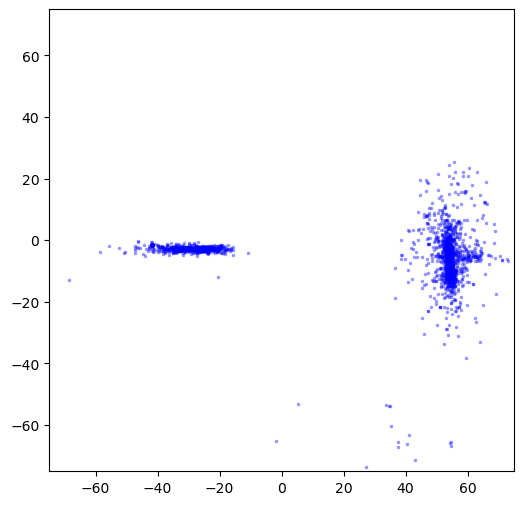

In [188]:
from IPython.display import clear_output
# plot in the x-z plane
for i in range(int(len(x_record)/10)):
    clear_output(wait=True)
    fig = plt.figure(figsize = (6,6))
    ax = plt.axes()
    ax.plot(x_record[i*10],z_record[i*10],'s',color='blue',alpha=0.3,markersize=2)
    ax.set_xlim(-75,75)
    ax.set_ylim(-75,75)
    #ax.set_zlim3d(-10,10)
    plt.show()

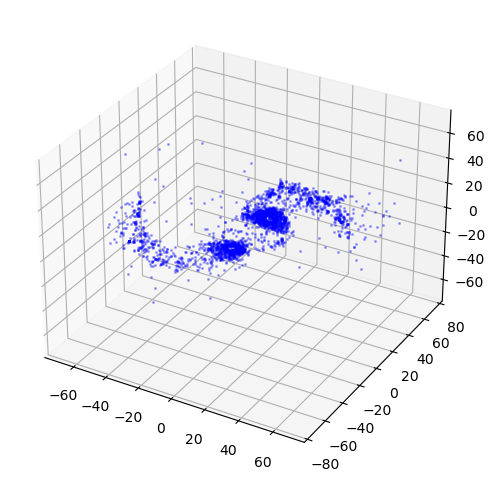

In [194]:
from IPython.display import clear_output
# Full 3-D simulation
for i in range(int(len(x_record)/20)+60):
    clear_output(wait=True)
    fig = plt.figure(figsize = (6,6))
    ax = plt.axes(projection = '3d')
    ax.plot(x_record[i*5],y_record[i*5],z_record[i*5],'s',color='blue',alpha=0.3,markersize=1)
    ax.set_xlim3d(-75,75)
    ax.set_ylim3d(-80,80)
    ax.set_zlim3d(-75,75)
    plt.show()

In [186]:
help(ax)

Help on Axes3D in module mpl_toolkits.mplot3d.axes3d object:

class Axes3D(matplotlib.axes._axes.Axes)
 |  Axes3D(fig, rect=None, *args, elev=30, azim=-60, roll=0, sharez=None, proj_type='persp', box_aspect=None, computed_zorder=True, focal_length=None, **kwargs)
 |  
 |  3D Axes object.
 |  
 |  .. note::
 |  
 |      As a user, you do not instantiate Axes directly, but use Axes creation
 |      methods instead; e.g. from `.pyplot` or `.Figure`:
 |      `~.pyplot.subplots`, `~.pyplot.subplot_mosaic` or `.Figure.add_axes`.
 |  
 |  Method resolution order:
 |      Axes3D
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fig, rect=None, *args, elev=30, azim=-60, roll=0, sharez=None, proj_type='persp', box_aspect=None, computed_zorder=True, focal_length=None, **kwargs)
 |      Parameters
 |      ----------
 |      fig : Figure
 |          The parent fig